# 常微分方程式の補遺
本編に盛り込もうと思って削った内容でもあります。
キーワードだけでももっと深く勉強するときの参考になるでしょう。

## ルンゲ-クッタ法
議論の道筋をシンプルにしたいので、
本編ではオイラー法・修正オイラー法だけを紹介しました。
しかしいろいろやっているとオイラー法の限界もいろいろ見えてきます。
そこでの解決法の 1 つとして有名なルンゲ-クッタ法を紹介します。
ルンゲクッタ法自体の導出は省略します。

### 一般化した微分方程式
次の一般的な初期値問題を考えます。

\begin{align}
 \frac{dx}{dt}
 =
 f(t, x), \quad
 x(t_0)
 =
 x_{0}.
\end{align}

右辺は時間変数まで含めて関数 $f$ で一般化してあります。
関数 $f$ には時間変数も含めています
放射性物質の場合は $f(t,x)=x$ です。

### ルンゲ-クッタ法の時の離散化
ルンゲ-クッタ法による離散化近似式 (数列から見れば漸化式) は次の通りです。

\begin{align}
 x_{n+1}
 &=
 x_{n} + \frac{h}{6} (k_{1} + 2 k_{2} + 2 k_{3} + k_{4}), \\
 t_{n+1}
 &=
 t_{n} + h.
\end{align}

$h$ はさっき $\Delta t$ と書いた量です。
そして $k_{i}$ は次のように定義しています。

\begin{align}
 k_{1}
 &=
 f \left(t_{n}, x_{n} \right), \\
 k_{2}
 &=
 f \left(t_{n} + \frac{h}{2}, x_{n} + \frac{h}{2} k_{1} \right), \\
 k_{3}
 &=
 f \left(t_{n} + \frac{h}{2}, x_{n} + \frac{h}{2} k_{2} \right), \\
 k_{4}
 &=
 f \left(t_{n} + h, x_{n}+ h k_{3} \right).
\end{align}

### 簡単な注意
見てすぐわかるように、ルンゲ-クッタ法で考えると計算量が増えます。
計算量が増える代わりに近似の精度が上がるのだと思ってください。

もっと言えば、近似の精度と同時に適用対象も増えます。
オイラー法の場合、方程式によっては修正オイラー法が必要だったことを思い出してください。
こうした方程式ごとに検討しなくてもある程度広い範囲の方程式を一括で扱えるのもこの方法の利点です。

## 放射性物質の崩壊の方程式への適用
最初の式は変わりません。
$k_{i}$ を書き直すだけです。

\begin{align}
 x_{n+1}
 &=
 x_{n} + \frac{h}{6} (k_{1} + 2 k_{2} + 2 k_{3} + k_{4}), \\
 t_{n+1}
 &=
 t_{n} + h, \\
 k_{1}
 &=
 x_{n}, \\
 k_{2}
 &=
 x_{n} + \frac{h}{2} k_{1}, \\
 k_{3}
 &=
 x_{n} + \frac{h}{2} k_{2}, \\
 k_{4}
 &=
 x_{n}+ h k_{3}.
\end{align}

ではコードに落としてみましょう。

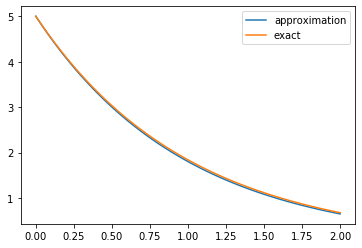

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def radioactive_rk(nt, init = 10):
    dt = 2 / (nt - 1)
    # 初期条件設定
    x = np.zeros(nt)
    x[0] = init

    for i in range(1, nt):
        k1 = x[i-1]
        k2 = x[i-1] + k1 * dt / 2
        k3 = x[i-1] + k2 * dt / 2
        k4 = x[i-1] + k3 * dt
        x[i] = x[i-1] - c * dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

    return x


# パラメータ設定
c = 1
nt = 101
init = 5

# 近似解
x1 = radioactive_rk(nt, init)
t = np.linspace(0, 2, nt)
plt.plot(np.linspace(0, 2, nt), x1)

# 厳密解
x2 = init * np.exp(- c * t)
plt.plot(t, x2)

# 凡例設定
plt.legend(['approximation', 'exact'])
# 描画
plt.show()

### 重要な部分の切り出し
大事な部分を関数化したのが次のコードです。
本質的には同じです。

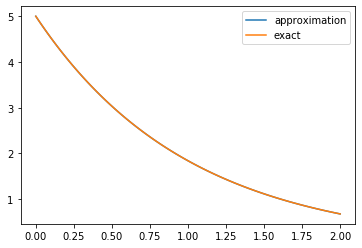

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def radioactive_rk(nt, init = 10):
    dt = 2 / (nt - 1)
    # 初期条件設定
    x = np.zeros(nt)
    x[0] = init

    def f(t, x):
        return -x

    # ベクトル計算で書き直したい
    for i in range(1, nt):
        k1 = f(dt * (i - 1), x[i-1])
        k2 = f(dt * (i - 1/2), x[i-1] + k1 * dt / 2)
        k3 = f(dt * (i - 1/2), x[i-1] + k2 * dt / 2)
        k4 = f(dt * (i - 1), x[i-1] + k3 * dt)
        x[i] = x[i-1] + c * dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

    return x

# パラメータ設定
c = 1
nt = 101
init = 5

# 近似解
x1 = radioactive_rk(nt, init)
t = np.linspace(0, 2, nt)
plt.plot(np.linspace(0, 2, nt), x1)

# 厳密解
x2 = init * np.exp(- c * t)
plt.plot(t, x2)

# 凡例設定
plt.legend(['approximation', 'exact'])
# 描画
plt.show()

## 2 階の線型常微分方程式
次に 2 階の常微分方程式を紹介します。
実際にルンゲクッタ法でないと誤差がひどくなる例です。
本編でも説明した通り、正確には、一階化した方程式に対して考えなしにオイラー法を適用すると誤差がひどくなるのであって、適切な離散化として修正オイラー法が必要になった事例です。

近似解法をきちんと考えないとおかしなことになる実例なので、
もしあなたが自分で微分方程式を解いていきたいなら、必ず念頭に置かなければいけないことです。

高校の物理で出てくる**ばねの振動（単振動）**がまさに例です。
項を増やすと減衰振動になったり、外力をつけたりいろいろなケースがあります。
まずは一番単純な式を考えましょう。

\begin{align}
 \frac{d^2 x}{dt^2}
 =
 - \omega^2 x.
\end{align}

さっきのオイラー法なりルンゲ-クッタ法なりは 1 階の方程式に対する計算法なので直接は使えません。
この場合は中間処理として $v = dx/dt$ を置いて計算すれば済みます。

実はこれは単なる数値計算の便法ではありません。
速度の意味もあるから、という表面的な理由ではなくもっと深く解析力学の文脈で物理としても大事な視点なのです。
もっといえばシンプレクティック計算法などの離散化手法・近似解法にも発展していきます。

まずはオイラー法で単純に離散化して計算しましょう。
微分方程式自体を書き直しておきます。

\begin{align}
 \frac{dx}{dt}
 =
 v, \quad
 \frac{dv}{dt}
 =
 - \omega^2 x.
\end{align}

これをオイラー法で近似・離散化します。

\begin{align}
 x_{n+1}
 =
 x_{n} + h v_{n}, \quad
 v_{n+1}
 =
 v_{n} - h \omega^{2} x_{n}
\end{align}

オイラー法をコードに落とします。

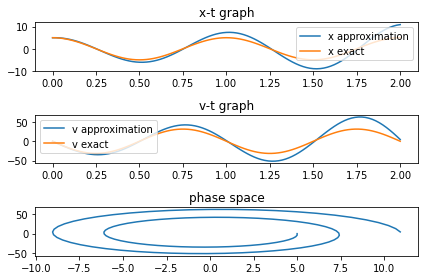

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def harmonic_euler(nt, init = (5, 0)):
    dt = t_range / (nt - 1)
    # 初期条件設定
    x = np.zeros(nt)
    v = np.zeros(nt)
    x[0] = init[0]
    v[0] = init[1]

    for i in range(1, nt):
        v[i] = v[i-1] - dt * (omega ** 2) * x[i-1]
        x[i] = x[i-1] + dt * v[i-1]

    return (x, v)

# パラメータ設定
omega = 2 * np.pi
nt = 101
t_range = 2
init = (5, 0)

# 近似解
harm = harmonic_euler(nt, init)
t = np.linspace(0, 2, nt)

# 厳密解
x_exact = init[0] * np.cos(- omega * t)
v_exact = - omega * init[0] * np.sin(omega * t)

# グラフ描画
plt.subplot(3, 1, 1)
plt.title('x-t graph')
plt.plot(np.linspace(0, 2, nt), harm[0])
plt.plot(t, x_exact)
plt.legend(['x approximation', 'x exact'])

plt.subplot(3, 1, 2)
plt.title('v-t graph')
plt.plot(np.linspace(0, 2, nt), harm[1])
plt.plot(t, v_exact)
plt.legend(['v approximation', 'v exact'])

plt.subplot(3, 1, 3)
plt.title('phase space')
plt.plot(harm[0], harm[1])

# 描画
plt.tight_layout()

## グラフの見方
見ての通り時間が進むごとに誤差が大きくなります。
`nt` を大きくすると少しはましになります。
実際に上のコードで `nt` を大きくして再計算してみてください。

実はまずいのは一番下の phase space （相空間）の図です。
この系はエネルギーが保存する系なので、相空間内の軌道が閉じてほしいのにそうなっていません。
シンプレクティックにやれば解消できる部分もありますが、
とにかくここではよろしくない挙動です。

本当はもっと検討すべき項目はあります。
ただ、ここでは $v = \frac{dx}{dt}$ を導入した上で**素直に**オイラー法で解くと問題が出ることはわかりました。
そこで次はルンゲ-クッタでやってみます。

## ルンゲ-クッタ法で単振動の方程式を解く
何はともあれ近似式を書くところからはじめましょう。

\begin{align}
 x_{n+1}
 &=
 x_{n} + \frac{h}{6} (k_{1} + 2 k_{2} + 2 k_{3} + k_{4}), \\
 t_{n+1}
 &=
 t_{n} + h, \\
 k_{1}
 &=
 v_{n}, \\
 k_{2}
 &=
 v_{n} + \frac{h}{2} k_{1}, \\
 k_{3}
 &=
 v_{n} + \frac{h}{2} k_{2}, \\
 k_{4}
 &=
 v_{n} + h k_{3}.
\end{align}

次が $v$ の式です。

\begin{align}
 v_{n+1}
 &=
 v_{n} + \frac{h}{6} (k_{1} + 2 k_{2} + 2 k_{3} + k_{4}), \\
 t_{n+1}
 &=
 t_{n} + h, \\
 k_{1}
 &=
 - \omega^2 x_{n}, \\
 k_{2}
 &=
 x_{n} - \frac{h}{2} \omega^2 k_{1}, \\
 k_{3}
 &=
 x_{n} - \frac{h}{2} \omega^2 k_{2}, \\
 k_{4}
 &=
 x_{n} - h \omega^2 k_{3}.
\end{align}

これを実装します。

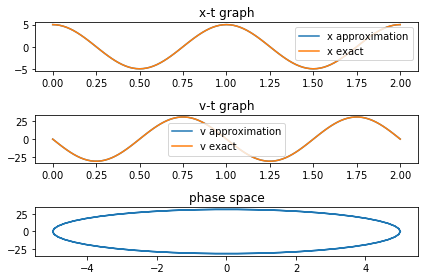

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def harmonic_rk(nt, init = 10):
    dt = t_range / (nt - 1)
    # 初期条件設定
    x = np.zeros(nt)
    v = np.zeros(nt)
    x[0] = init[0]
    v[0] = init[1]

    def fx(t, x, v):
        return v

    def fv(t, x, v):
        return - (omega ** 2) * x

    for i in range(1, nt):
        xk1 = fx(dt * (i - 1), x[i-1], v[i-1])
        vk1 = fv(dt * (i - 1), x[i-1], v[i-1])

        xk2 = fx(dt * (i - 1/2), x[i-1] + xk1 * dt / 2, v[i-1] + vk1 * dt / 2)
        vk2 = fv(dt * (i - 1/2), x[i-1] + xk1 * dt / 2, v[i-1] + vk1 * dt / 2)

        xk3 = fx(dt * (i - 1/2), x[i-1] + xk2 * dt / 2, v[i-1] + vk2 * dt / 2)
        vk3 = fv(dt * (i - 1/2), x[i-1] + xk2 * dt / 2, v[i-1] + vk2 * dt / 2)

        xk4 = fx(dt * (i - 1),   x[i-1] + xk3 * dt,     v[i-1] + vk3 * dt)
        vk4 = fv(dt * (i - 1),   x[i-1] + xk3 * dt,     v[i-1] + vk3 * dt)

        x[i] = x[i-1] + dt / 6 * (xk1 + 2 * xk2 + 2 * xk3 + xk4)
        v[i] = v[i-1] + dt / 6 * (vk1 + 2 * vk2 + 2 * vk3 + vk4)

    return (x, v)

# パラメータ設定
omega = 2 * np.pi
nt = 101
t_range = 2
init = (5, 0)

# 近似解
harm = harmonic_rk(nt, init)
t = np.linspace(0, 2, nt)

# 厳密解
x_exact = init[0] * np.cos(- omega * t)
v_exact = - omega * init[0] * np.sin(omega * t)

# グラフ描画
plt.subplot(3, 1, 1)
plt.title('x-t graph')
plt.plot(np.linspace(0, 2, nt), harm[0])
plt.plot(t, x_exact)
plt.legend(['x approximation', 'x exact'])

plt.subplot(3, 1, 2)
plt.title('v-t graph')
plt.plot(np.linspace(0, 2, nt), harm[1])
plt.plot(t, v_exact)
plt.legend(['v approximation', 'v exact'])

plt.subplot(3, 1, 3)
plt.title('phase space')
plt.plot(harm[0], harm[1])

# 描画
plt.tight_layout()

## 結果の分析
今度の一致具合はなかなかよいです。
何より良くなったのは相空間軌道です：ちゃんと閉じてくれました。

まずは、方程式や考えている状況に応じて近似の仕方にも工夫が必要なことを覚えておいてください。
自分でいろいろやってみると、さらにいろいろな問題にぶつかるでしょう。
その多くはすでに先人が経験済みで、対策もすでに考えられていることが多いです。
興味があればぜひ数値計算の勉強をしてみてください。

# アンケート
毎回アンケートを取っています。
質問や要望がある場合もこちらにどうぞ。

- [アンケートへのリンク](https://goo.gl/forms/hn7bUP4sblqOkBcI3)

アンケートは匿名なので気楽にコメントしてください。
直接返事してほしいことがあれば、
メールなど適当な手段で連絡してください。